In [2]:
import numpy as np
from itertools import islice
import statistics
import matplotlib.pyplot as plt

In [15]:
# data structure

# the data is stored in 2D array data[hlidx][rdidx]

# each graph is stored as 2D array at data[hlidx][rdidx]
# graph[stidx][wkidx]

hl = [14, 16]
_hl = { 14: 0, 16: 1}

rd = [0, 500]
_rd = { 0: 0, 500: 1}

st = ['big', 'newrcu', 'rcu']
_st = { 'big': 0, 'newrcu': 1, 'rcu': 2 }
stcolor = ['red', 'blue', 'green']
stlabel = ['single mutex', 'RCU']
stmarker = ['o', 'o']

wk = [2, 4, 6, 8]
_wk = { 2: 0, 4: 1, 6: 2, 8: 3 }

data = np.zeros((2,2,3,4))


In [17]:
# read from file
fname = 'result.txt'

fh = open(fname, 'r')

while True:
    param = fh.readline()
    if not param:
        break
    ps = param.split()
    next5 = [float(x.split()[1]) for x in list(islice(fh, 5))]
    data[_hl[int(ps[2])]][_rd[int(ps[3])]][_st[ps[0]]][_wk[int(ps[1])]] = statistics.median(next5)

print(data)


[[[[ 20.7469   21.8914   20.1238   19.245  ]
   [ 40.8511   67.3491   86.6986  102.796  ]
   [ 41.0607   67.9939   85.9827  102.796  ]]

  [[  3.80435   3.74424   3.6794    3.66817]
   [  4.2897    5.21214   6.10017   7.16561]
   [  4.2735    5.21236   5.72749   6.3197 ]]]


 [[[  5.27756   5.24068   4.96516   4.80016]
   [ 10.7261   18.49     24.9242   29.8173 ]
   [ 10.5964   18.4036   24.6063   29.7256 ]]

  [[  2.3622    2.30769   2.28484   2.25137]
   [  3.24412   4.32006   5.4878    6.55632]
   [  3.29473   4.38418   5.22476   6.44699]]]]


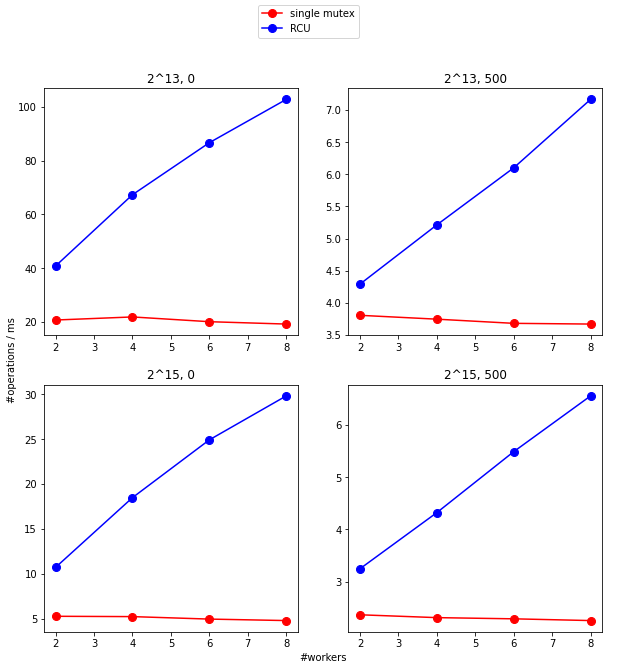

In [30]:
# draw the graphs

plt.rcParams["figure.figsize"] = (10,10)

fig, axs = plt.subplots(2, 2)

for hlidx in range(2):
    for rdidx in range(2):
        axs[hlidx][rdidx].set_title('2^{}, {}'.format(hl[hlidx]-1, rd[rdidx]))
        for stidx in range(2):
            axs[hlidx][rdidx].plot(wk, data[hlidx][rdidx][stidx], 
                                   color=stcolor[stidx], label=stlabel[stidx],
                                   marker=stmarker[stidx], markersize=8);
#         axs[hlidx][rdidx].legend()
            
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("#workers")
plt.ylabel("#operations / ms")
handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
